In [7]:
%cd /content/drive/MyDrive/Digital_Image_Processing_EE608

/content/drive/MyDrive/Digital_Image_Processing_EE608


In [8]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   monodepth2 (modified content, untracked content)
	modified:   s22022_hw0/s22022_hw0.ipynb
	modified:   s22022_hw3/s22022_hw3.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


# Problem 1: Gray Images

#### Importing Necessary library 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from PIL import Image
import cv2
import numpy as np
import imageio
import os
from google.colab.patches import cv2_imshow

'''
Change the path here to run the below code
'''

RGB_img = "/content/drive/MyDrive/misc/misc/4.1.01.tiff"
compressed_image= "/content/drive/MyDrive/stinkbug.jpg"
grey_img= "/content/main-qimg-3b9edf68c9278c4c852c16d98ae0649f-lq.jpg"

foreground_image="/content/drive/MyDrive/misc/foreground.png"
background_image="/content/drive/MyDrive/misc/background.png"

video_path="/content/drive/MyDrive/misc/vecteezy.mp4"
screenshot_save_dir="/content/drive/MyDrive/misc/Test_frame"
quantized_screenshot_dir="/content/drive/MyDrive/misc/Test_frame_quant"

saving_quantized_video="/content/drive/MyDrive/misc/Atest_video.mp4"



#### 1.Read the contents of an image into an array I (recall from class that digital images are represented as an array of numbers). Use matplotlib to read and display images - https://matplotlib.org/tutorials/introductory/images.html. Display the image I 

##### Ans.1

In [ ]:
img = mpimg.imread(RGB_img)
print(img) 

[[[ 52  46  42]
  [ 47  40  38]
  [ 50  42  34]
  ...
  [137 131 136]
  [126 137 136]
  [126 134 130]]

 [[ 55  45  43]
  [ 50  44  35]
  [ 54  40  38]
  ...
  [129 139 143]
  [129 134 139]
  [121 142 146]]

 [[ 46  42  39]
  [ 49  42  43]
  [ 52  42  55]
  ...
  [126 137 133]
  [123 131 130]
  [118 134 128]]

 ...

 [[  4   5   5]
  [  3   3   4]
  [  3   3   3]
  ...
  [ 60  64  44]
  [ 84  93  91]
  [ 98 105  93]]

 [[ 11   8  10]
  [ 12  11  12]
  [ 12  10  10]
  ...
  [ 60  68  40]
  [ 86  88  64]
  [100 105  91]]

 [[ 20  18  16]
  [ 19  16  16]
  [ 20  14  13]
  ...
  [ 55  56  42]
  [ 70  78  58]
  [ 93 100  80]]]


##### Display the Image

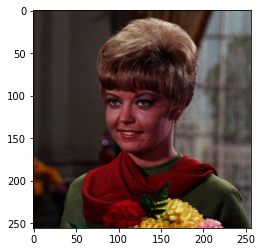

In [ ]:
imgplot = plt.imshow(img)

#### 2. Print the maximum and minimum pixel values of I. Based on these values, how many bits are needed (used) per pixel? What is the resolution of I? Print your answer.

##### Ans 2.

In [ ]:
smallest = np.amin(img)
biggest = np.amax(img)

print(smallest)
print(biggest)

1
254


In [ ]:
if np.amax(img) <=1:
  print("1") 
elif np.amax(img) <=3:
  print("2") 
elif np.amax(img) <=7:
  print("3")
elif np.amax(img) <=15:
  print("4") 
elif np.amax(img) <=31:
  print("5") 
elif np.amax(img) <=63:
  print("6") 
elif np.amax(img) <=127:
  print("7") 
elif np.amax(img) <=255:
  print("8") 

8


##### Finding the resolution of the image

In [ ]:
print(img.shape)

(256, 256, 3)


#### 3. What is the size of the compressed image you downloaded? Print your answer. Based on the previous answers and assuming 256 gray levels, how efficienctly (compressed image size versus 8 bits per pixel size) is the image compressed for storage? Print your answer.

##### Ans 3.

In [ ]:
import os
compressed_size=os.path.getsize(compressed_image)
print(compressed_size)

predicted_size = img.shape[0] * img.shape[1]
print(predicted_size)

efficiency = compressed_size / predicted_size
print(efficiency)

55646
163540
0.34025926378867555


#### 4. Write a function that accepts as input an image I and a bitplane index i.e., a number b such that 0 ≤ b ≤ B − 1. The function must display the bitplane b of the image I as a binary image. Use the convention that b = 0 corresponds to the least significant bitplane and b = B − 1 corresponds to the most significant bitplane.

##### Ans 4.

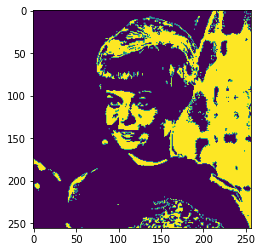

In [ ]:
def bitplane_slicing(plane):
  img = cv2.imread(RGB_img,0)

  lst = []
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          lst.append(np.binary_repr(img[i][j] ,width=8))
  
  if plane==8:
    bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
  elif plane==7:
    bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
  elif plane==6:
    bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
  elif plane==5:
    bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
  elif plane==4:
    bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
  elif plane==3:
    bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
  elif plane==2:
    bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
  elif plane==1:
    bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
  imgplot = plt.imshow(bit_img)

bitplane_slicing(7)

#### 5. Write a function, which takes an 8-bit image and , the number of bits (B) to which the image needs to be quantized to and returns the B-bit quantized image. Display results for the image for 8,4,2,1 bits. Observe how the quality is degrading with the number of bits.

##### Ans 5. 

In [ ]:
def quantized_image(path,num_levels):
  image = imageio.imread(path)
  image = np.array(image, dtype=np.float32)
  bins = np.linspace(0, 255, num_levels+1)
  image = np.digitize(image, bins) - 1

  for i in range(num_levels):
      mask = (image == i)
      image[mask] = np.mean(bins[i:i+2])
  image = np.clip(image, 0, 255).astype(np.uint8)

  return image


##### 256 level image

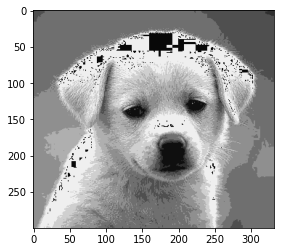

In [ ]:
num_levels=8
imgplote = plt.imshow(quantized_image(grey_img,num_levels))

##### 128 level image

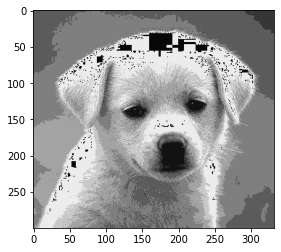

In [ ]:
num_levels=7
imgplote = plt.imshow(quantized_image(grey_img,num_levels))

##### 64  level image

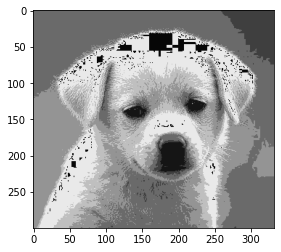

In [ ]:
num_levels=6
imgplote = plt.imshow(quantized_image(grey_img,num_levels))

##### 32 level image

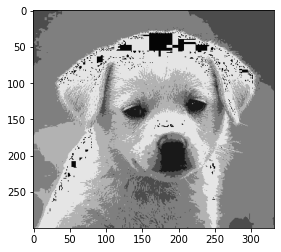

In [ ]:
num_levels=5
imgplote = plt.imshow(quantized_image(grey_img,num_levels))

##### 16 level image

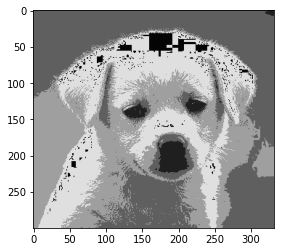

In [ ]:
num_levels=4
imgplote = plt.imshow(quantized_image(grey_img,num_levels))

##### 8 level image

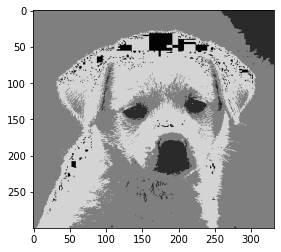

In [ ]:
num_levels=3
imgplote = plt.imshow(quantized_image(grey_img,num_levels))

##### 4 level Image

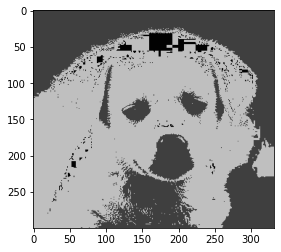

In [ ]:
num_levels=2
imgplote = plt.imshow(quantized_image(grey_img,num_levels))

##### 2 level Image

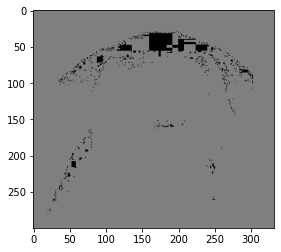

In [ ]:
num_levels=1
imgplote = plt.imshow(quantized_image(grey_img,num_levels))

# Problem 2: RGB Image

#### 1. Write a function to read RGB image and display each channel seperately and convert RGB image to a grayscale image. (Don’t use in-built functions).

##### Ans 1.

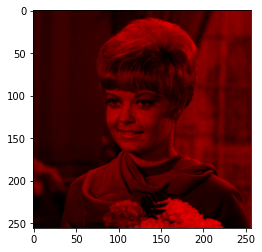

In [ ]:
def Red_Image():
  img = np.array(Image.open(RGB_img))
  img.setflags(write=1)
  img[:,:,1]=0
  img[:,:,2]=0
  return img

imgplot = plt.imshow(Red_Image())

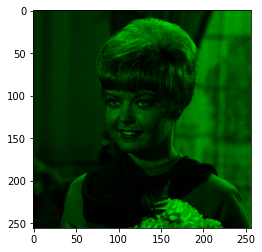

In [ ]:
def green_Image():
  img = np.array(Image.open(RGB_img))
  img.setflags(write=1)
  img[:,:,0]=0
  img[:,:,2]=0
  return img

imgplot = plt.imshow(green_Image())

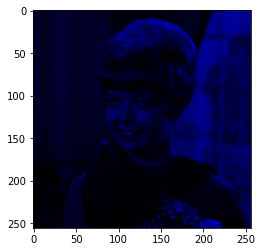

In [ ]:
def blue_Image():
  img = np.array(Image.open(RGB_img))
  img.setflags(write=1)
  img[:,:,0]=0
  img[:,:,1]=0
  return img

imgplot = plt.imshow(blue_Image())

[[215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215

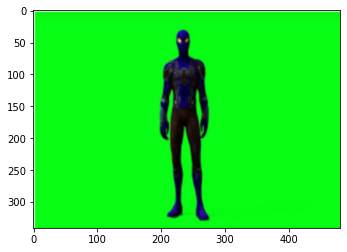

In [ ]:
ar = []
c = 0
for i in img:
  ar.append([])
  for j in i:
    gray = ((0.299 * j[0]) + (0.299 * j[1]) + (0.299 * j[2]))
    gray = math.floor(gray)
    ar[c].append(gray)
  c = c + 1
print(ar)
#print(ar.shape)
imgplote = plt.imshow(img)


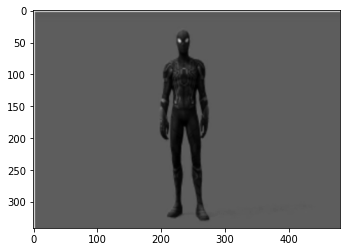

In [ ]:
imgplote = plt.imshow(ar,cmap='gray')


#### 2. Write a function that takes a color image and finds the most frequently occurring color from the image.

##### Ans.2

In [ ]:
def dominant_color(path):
  
  img = cv2.imread(path,cv2.IMREAD_COLOR)

  data = np.reshape(img, (-1,3))
  print(data.shape)
  data = np.float32(data)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)

  print('Dominant color is: bgr({})'.format(centers[0].astype(np.int32)))
  return centers[0].astype(np.int32)

dominant_value=dominant_color(foreground_image)

(164021, 3)
Dominant color is: bgr([ 12 236  25])


#### 3. Write a function, which takes two images foreground and background that extracts the fore-ground object and places it in the background and returns the resultant image.(Refer Figure1)

##### Ans. 3

(164021, 3)
Dominant color is: bgr([ 12 236  25])


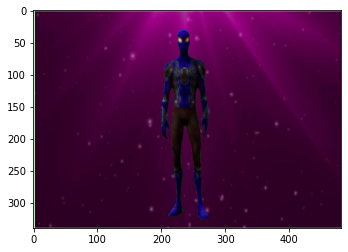

In [ ]:
dominant_value=dominant_color(foreground_image)
foreground = np.array(cv2.imread(foreground_image))
background= np.array(cv2.imread(background_image))

foreground=np.delete(foreground,0,0)
background=np.delete(background,[0,1],1)

img = np.empty(foreground.shape, dtype=np.uint32)

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
     if np.linalg.norm(foreground[i, j, :] - dominant_value) <= 180:
       img[i, j, :] = background[i, j, :]
     else:
       img[i, j, :] = foreground[i, j, :]
imgplote = plt.imshow(img)

# Problem 3: Digital Video

#### 1. Write a function to read the Mp4 video using python and extract the frames from the video.

##### Ans.1 

In [ ]:
def extract_frame(path):
  cap = cv2.VideoCapture(path)
  if cap.isOpened():
      current_frame = 0
      while True:
          ret, frame = cap.read()
          if ret:
              name =screenshot_save_dir+"/frame"+str(current_frame)+".jpg"
              print(f"Creating file... {name}")
              cv2.imwrite(name, frame)
              current_frame += 1
      cap.release()
  cv2.destroyAllWindows()

#extract_frame("/content/drive/MyDrive/misc/vecteezy.mp4")


#### 2. Quantize the extracted frames with desired number of bits (B-Given by user) and convert the images back to a video (MP4) and play the video. 

#####  Ans. 2

In [ ]:
def quantized_video (num_level):
  width=1920
  height=1080
  
  extract_frame(video_path)
  entries = os.listdir(screenshot_save_dir)
  for i in entries:
    image_path=screenshot_save_dir+'/'+i
    cv2.imwrite(quantized_screenshot_dir+'/'+i,quantized_image(image_path,num_levels))

  fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
  video = cv2.VideoWriter(saving_quantized_video, fourcc, 1, (width, height))

  for i in range(0,183):
    img = cv2.imread(quantized_screenshot_dir +'/frame'+str(i) + '.jpg')
    video.write(img)

  cv2.destroyAllWindows()
  video.release()

quantized_video(3)

NameError: ignored

#Thank You